In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [4]:
pd.set_option('display.max_colwidth', 400)
pd.set_option('display.max_rows',4000)

In [5]:
df = pd.read_csv('UNdata_tobacco.csv')
df.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg)
0,Afghanistan,2016,Cigarettes containing tobacco,Import,49111872.0,2629072.0
1,Afghanistan,2016,Homogenized or reconstituted tobacco,Import,1177842.0,NaN
2,Afghanistan,2015,Cigarettes containing tobacco,Import,87227851.0,4347904.0
3,Afghanistan,2015,Homogenized or reconstituted tobacco,Import,427504.0,106520.0
4,Afghanistan,2014,Cigarettes containing tobacco,Import,3984800.0,207074.0


In [6]:
df.columns = df.columns.str.replace('\s+', '_')

In [7]:
df.columns = df.columns.str.replace('(','_')

In [8]:
df.columns = df.columns.str.replace(')','_')

In [9]:
df.columns = df.columns.str.replace('Country_or_Area','Country_Area')
df.columns = df.columns.str.replace('Trade__USD_','USD')
df.columns = df.columns.str.replace('Weight__kg_','Weight')

In [10]:
df.head(1)

,Country_Area,Year,Commodity,Flow,USD,Weight
0,Afghanistan,2016,Cigarettes containing tobacco,Import,49111872.0,2629072.0


In [11]:
df.count()

Country_Area    48995
Year            48995
Commodity       48995
Flow            48995
USD             48995
Weight          48285
dtype: int64

In [12]:
df.Flow.value_counts()

Import       26829
Export       18849
Re-Export     2692
Re-Import      625
Name: Flow, dtype: int64

In [13]:
#df.groupby('Flow').Country_Area.value_counts().sort_values(ascending=False)

In [14]:
export_df = df[df.Flow.str.contains("Export", case=False, na=False)]
export_df.head()

,Country_Area,Year,Commodity,Flow,USD,Weight
14,Albania,2016,"Tobacco, unmanufactured, not stemmed or stripped",Export,183785.0,103767.0
15,Albania,2016,"Tobacco, unmanufactured, stemmed or stripped",Export,4110889.0,1323120.0
18,Albania,2016,Cigarettes containing tobacco,Export,694779.0,162157.0
24,Albania,2013,"Tobacco, unmanufactured, stemmed or stripped",Export,4603628.0,1205741.0
27,Albania,2013,Cigarettes containing tobacco,Export,1495582.0,309236.0


In [15]:
export_df.Commodity.value_counts()

Cigarettes containing tobacco                            3839
Cigarette or pipe tobacco and tobacco substitute mixe    2774
Cigars, cheroots and cigarillos, containing tobacco      2688
Tobacco, unmanufactured, stemmed or stripped             2598
Tobacco, unmanufactured, not stemmed or stripped         2523
Products of tobacco, substitute nes, extract, essence    2106
Cigars, cheroots, cigarettes, with tobacco substitute    1996
Tobacco refuse                                           1921
Homogenized or reconstituted tobacco                     1096
Name: Commodity, dtype: int64

In [16]:
pd.options.display.float_format = '{:.0f}'.format

In [17]:
df_2017 = export_df[export_df['Year']==2017]
df_2017.head()

,Country_Area,Year,Commodity,Flow,USD,Weight
198,Algeria,2017,Cigarettes containing tobacco,Export,11975,866
200,Algeria,2017,"Products of tobacco, substitute nes, extract, essence",Export,5809,410
821,Argentina,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,5629831,2276579
823,Argentina,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,287135184,60726137
825,Argentina,2017,Tobacco refuse,Export,10458316,20653260


In [18]:
#LET'S REMOVE 'EU-28'
df_2017 = df_2017[df_2017.Country_Area != 'EU-28']
df_2017.head()

,Country_Area,Year,Commodity,Flow,USD,Weight
198,Algeria,2017,Cigarettes containing tobacco,Export,11975,866
200,Algeria,2017,"Products of tobacco, substitute nes, extract, essence",Export,5809,410
821,Argentina,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,5629831,2276579
823,Argentina,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,287135184,60726137
825,Argentina,2017,Tobacco refuse,Export,10458316,20653260


In [38]:
usd_2017 = df_2017.groupby('Country_Area')['USD'].sum().reset_index(name='usd_2017')
top20_usd17 = usd_2017.sort_values(by='usd_2017', ascending=True).tail(20)
top20_usd17.tail()

,Country_Area,usd_2017
10,"China, Hong Kong SAR",1769986179
6,Brazil,2092160511
54,USA,3089718026
39,Poland,3340492853
18,Germany,4519131766


In [67]:
#colors = ['#423525','#AA552E','#586923','#AF0714','#86909A','#B08F70']

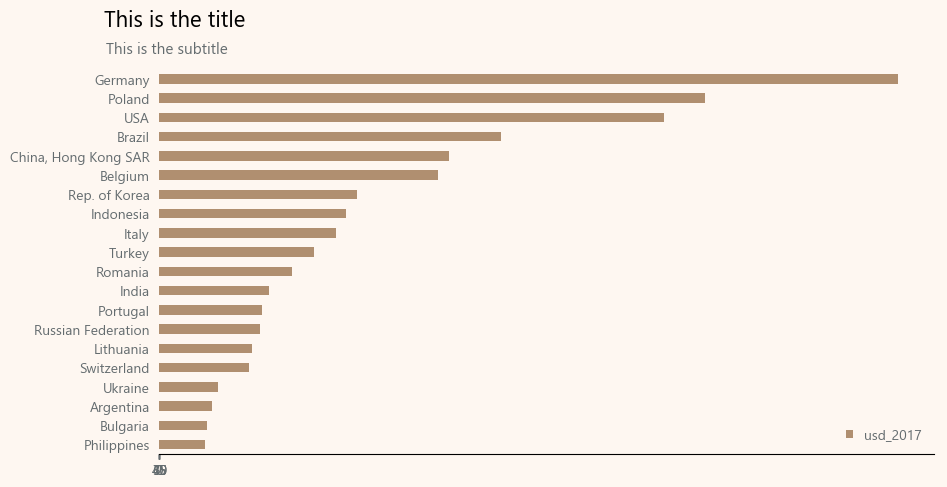

In [87]:
#color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
ax = top20_usd17.plot(kind='barh', x='Country_Area', y='usd_2017',figsize=(10, 5), color='#B08F70')

# CUSTOMIZATION CODE GOES UNDER HERE

plt.rcdefaults()
plt.rcParams.update({
    #ERROR: 'NameError: name 'cycler' is not defined'
    #'axes.prop_cycle': cycler('color', ['#423525','#AA552E','#586923','#AF0714','#86909A','#B08F70']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
    'legend.frameon': False,
    'legend.fontsize': 'small',
    'legend.handlelength': 0.5,
    'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })


ax.set_xlabel('something',fontsize=12,fontname="Leelawadee UI")
ax.set_ylabel('something',fontsize=12,fontname="Leelawadee UI")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.set_xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75])
ax.set_xticklabels(['0','','','15','','','30','','','45','','','60','','','75'],color='#646C6F')

title_string = "This is the title"
subtitle_string = "This is the subtitle"
plt.suptitle(title_string, y=1, x=0.14, fontsize=16,color='black')
plt.title(subtitle_string, y=1.02, x=0.01, fontsize=11)

# ax.set_xlabel('GDP per capita',fontsize=12,fontname="Leelawadee UI")
# ax.set_ylabel('Life expectancy',fontsize=12,fontname="Leelawadee UI")
# ax.axes.labelpad: 4.0

ax.tick_params(axis='y',left=False)

# then we save it
# plt.savefig("personal-graph-bar-one-color.pdf")
plt.show()

In [22]:
top20_usd17.plot(kind='barh')

In [23]:
weight_2017 = df_2017.groupby('Country_Area')['Weight'].sum().reset_index(name='weight_2017')
top20_weight17 = weight_2017.sort_values(by='weight_2017',ascending=True).tail(20)
top20_weight17.head()

,Country_Area,weight_2017
40,Portugal,32197892
51,Switzerland,32666254
31,Malaysia,35984560
30,Lithuania,37361463
7,Bulgaria,41889947


In [24]:
merge = pd.merge(top20_usd17,weight_2017,on='Country_Area')
merge.head()

,Country_Area,usd_2017,weight_2017
0,Philippines,277496260,85363016
1,Bulgaria,292856146,41889947
2,Argentina,322269830,86333393
3,Ukraine,355730145,43353839
4,Switzerland,548545303,32666254


In [25]:
germany = export_df[export_df['Country_Area']=='Germany']
germany.head()

,Country_Area,Year,Commodity,Flow,USD,Weight
16909,Germany,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,47142234,6208430
16911,Germany,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,421106891,59851021
16913,Germany,2017,Tobacco refuse,Export,6639470,7110330
16915,Germany,2017,"Cigars, cheroots and cigarillos, containing tobacco",Export,207915273,4553525
16917,Germany,2017,Cigarettes containing tobacco,Export,3077966524,130394474


In [26]:
german_usd = germany.groupby('Year').USD.sum().reset_index(name='german_usd')
german_usd.head()

,Year,german_usd
0,1991,1248924008
1,1992,1450401968
2,1993,1240888008
3,1994,1420087040
4,1995,1450777032


In [27]:
german_weight = germany.groupby('Year').Weight.sum().reset_index(name='german_weight')
german_weight.head()

,Year,german_weight
0,1991,118757463
1,1992,116123440
2,1993,106608802
3,1994,128239999
4,1995,123111198


In [28]:
poland = export_df[export_df['Country_Area']=='Poland']
poland_usd = poland.groupby('Year').USD.sum().reset_index(name='poland_usd')
poland_usd.head()

,Year,poland_usd
0,1994,53496000
1,1995,26932001
2,1996,43555000
3,1997,47625674
4,1998,44607000


In [29]:
poland_weight = poland.groupby('Year').Weight.sum().reset_index(name='poland_weight')
poland_weight.head()

,Year,poland_weight
0,1994,6016000
1,1995,4982794
2,1996,10669728
3,1997,13164254
4,1998,13287925


In [30]:
usa = export_df[export_df['Country_Area']=='USA']
usa_usd = usa.groupby('Year').USD.sum().reset_index(name='usa_usd')
usa_usd.head()

,Year,usa_usd
0,1991,6044897602
1,1992,6194879623
2,1993,5607950732
3,1994,6811425912
4,1995,6714925325


In [31]:
usa_weight = usa.groupby('Year').USD.sum().reset_index(name='usa_weight')
usa_weight.head()

,Year,usa_weight
0,1991,6044897602
1,1992,6194879623
2,1993,5607950732
3,1994,6811425912
4,1995,6714925325


In [32]:
hist_usd = pd.merge(pd.merge(german_usd,poland_usd,on='Year'),usa_usd,on='Year')
hist_usd.head()

,Year,german_usd,poland_usd,usa_usd
0,1994,1420087040,53496000,6811425912
1,1995,1450777032,26932001,6714925325
2,1996,1681098798,43555000,6698720493
3,1997,1449310073,47625674,6665179625
4,1998,1643165032,44607000,6333127932


In [33]:
hist_w = pd.merge(pd.merge(german_weight,poland_weight,on='Year'),usa_weight,on='Year')
hist_w.head()

,Year,german_weight,poland_weight,usa_weight
0,1994,128239999,6016000,6811425912
1,1995,123111198,4982794,6714925325
2,1996,145286001,10669728,6698720493
3,1997,141665425,13164254,6665179625
4,1998,152201196,13287925,6333127932


In [34]:
hist_usd.plot(kind='line',x='Year')

In [78]:
colors = ['#423525','#AA552E','#586923']

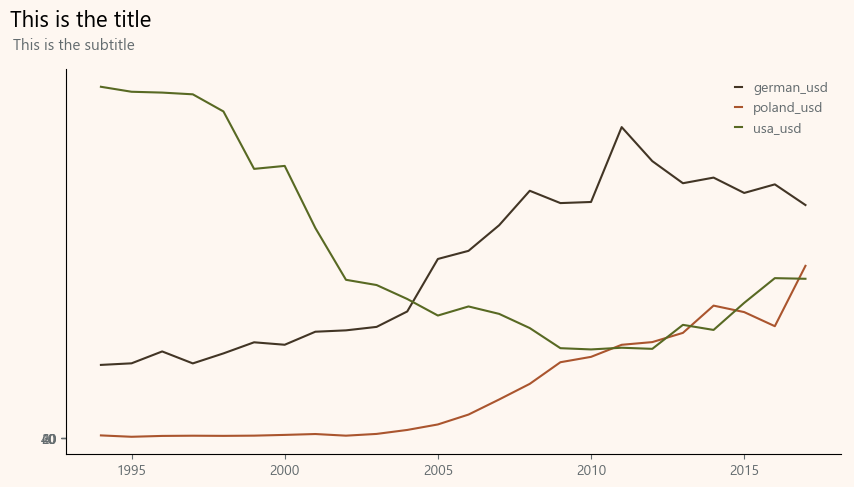

In [81]:
ax = hist_usd.plot(kind='line', x='Year', figsize=(10, 5), color=colors)

plt.rcdefaults()
plt.rcParams.update({
    #'axes.prop_cycle': cycler('color', ['#423525','#AA552E','#586923','#AF0714','#86909A','#B08F70']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
#    'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
     'legend.handlelength': 0.5,
     'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })


ax.set_xlabel('Visas by continent',fontsize=12,fontname="Segoe UI Symbol")
ax.set_ylabel("It's more than 15 years that South America has been coming first",fontsize=12,fontname="Segoe UI Symbol")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(True)
# ax.spines['bottom'].set_visible(True)
# ax.spines['right'].set_visible(False)
ax.set_yticks([0,10,20,30,40,50,60])
ax.set_yticklabels(['0','','20','','40','','60'],color='#646C6F')
# ax.set_xticks([1990,1991,1992,1993,1994,1995,2000,2005,2010,2015,2020])
# ax.set_yticklabels(['','1995','','2005','','2015',''],color='#646C6F')

title_string = "This is the title"
subtitle_string = "This is the subtitle"
plt.suptitle(title_string, y=1, x=0.14, fontsize=16,color='black')
plt.title(subtitle_string, y=1.03, x=0.01, fontsize=11)

plt.show()


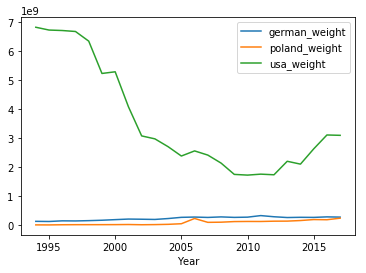

In [117]:
hist_w.plot(kind='line',x='Year')

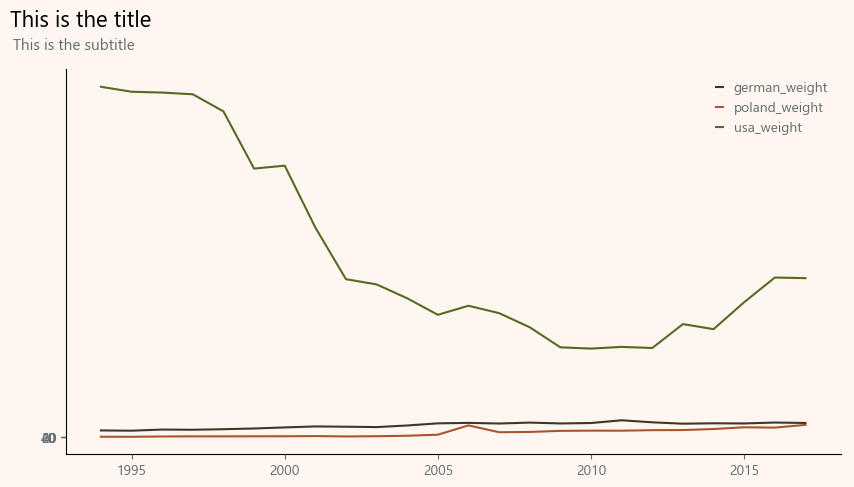

In [74]:
ax = hist_w.plot(kind='line', x='Year', figsize=(10, 5), color=colors)

plt.rcdefaults()
plt.rcParams.update({
#    'axes.prop_cycle': cycler('color', ['#423525','#AA552E','#586923','#AF0714','#86909A','#B08F70']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
#    'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
     'legend.handlelength': 0.5,
     'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })


ax.set_xlabel('Visas by continent',fontsize=12,fontname="Segoe UI Symbol")
ax.set_ylabel("It's more than 15 years that South America has been coming first",fontsize=12,fontname="Segoe UI Symbol")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(True)
# ax.spines['bottom'].set_visible(True)
# ax.spines['right'].set_visible(False)
ax.set_yticks([0,10,20,30,40,50,60])
ax.set_yticklabels(['0','','20','','40','','60'],color='#646C6F')
# ax.set_xticks([1990,1991,1992,1993,1994,1995,2000,2005,2010,2015,2020])
# ax.set_yticklabels(['','1995','','2005','','2015',''],color='#646C6F')

title_string = "This is the title"
subtitle_string = "This is the subtitle"
plt.suptitle(title_string, y=1, x=0.14, fontsize=16,color='black')
plt.title(subtitle_string, y=1.03, x=0.01, fontsize=11)

plt.show()
